In [3]:
import sys
sys.path.append("..")
from IPython.display import display

In [4]:
import numpy as np
import logging
import pickle
import time
import importlib 
import copy

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse
from matplotlib import gridspec



In [6]:
from scripts import reclusterTree
from scripts import linkageList
from scripts import heatClustermap
from scripts import Tree1D
from scripts import likelihood
from scripts import beamsearchTJS
from scripts import N2Greedy
from scripts import beamSearch as bs
from scripts import beamSearchOptimal as BSO

In [7]:
"""Reload filles after changes"""
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)
importlib.reload(Tree1D)
importlib.reload(likelihood)
importlib.reload(N2Greedy)
importlib.reload(bs)
importlib.reload(BSO)

<module 'scripts.beamSearchOptimal' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/beamSearchOptimal.py'>

# VISUALIZATIONS

## CLUSTERING ALGORITHMS TESTED ON JETS GENERATED WITH THE TOY GENERATIVE MODEL 

Functions to run the reclustering algorithms over a list of jets

In [8]:
filename = "100_70"
index=int(filename.split("_")[-1])

In [9]:
with open("data/beamScanJets/jets"+str(filename)+".pkl", "rb") as fd:  
        truth_jet,\
        truthLogLH, \
        greedyJet,\
        GreedyLogLH,\
        BSOtimeList,\
        BSO_jets,\
        BSO_jetsLogLH, \
        bstimeList, \
        bs_jets,\
        bs_jetsLogLH = pickle.load(fd, encoding='latin-1')

#### Recluster jet with generalized kt algorithms

In [10]:
jet_name = ('_').join(str("jets"+str(filename)).split('_')[-3:-1])
truth_jet["name"]=jet_name
truth_jet["algorithm"]="truth"

In [11]:
# Recluster jet
recluster = False
if recluster:
    reclusterKt = reclusterTree.recluster(truth_jet, alpha=1, out_dir = "data/beamScanJets/")
    reclusterAntikt = reclusterTree.recluster(truth_jet, alpha=-1, out_dir = "data/beamScanJets/")
    reclusterCA = reclusterTree.recluster(truth_jet, alpha=0, out_dir = "data/beamScanJets/")

In [12]:
input_dir = "data/beamScanJets/"

# Load reclustered jets
with open(input_dir+ str(truth_jet["name"])+'_1' + '.pkl', "rb") as fd: reclusterKt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_-1' + '.pkl', "rb") as fd: reclusterAntikt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_0' + '.pkl', "rb") as fd: reclusterCA = pickle.load(fd, encoding='latin-1')

#### Get list necessary for visualizations

In [13]:
def getVisualizationLists(inputJet):
    
    jet = copy.deepcopy(inputJet)
    
    """ Traverse jet to get ancestors list """
    tree, \
    content, \
    node_id, \
    tree_ancestors = N2Greedy._traverse(
        jet["root_id"],
        jet["content"],
        jetTree= jet["tree"],
        Nleaves= jet["Nconst"],
    )

    jet["root_id"] = 0
    jet["node_id"] = node_id
    jet["tree"] = np.asarray(tree).reshape(-1, 2)
    jet["content"] = np.asarray(content).reshape(-1, 2)
    jet["tree_ancestors"] = tree_ancestors
    
    return jet

In [14]:
BSO_jet = getVisualizationLists(BSO_jets[-1])
Greedy_jet = getVisualizationLists(greedyJet)

#### VISUALIZATIONS

Beam Search LH JET


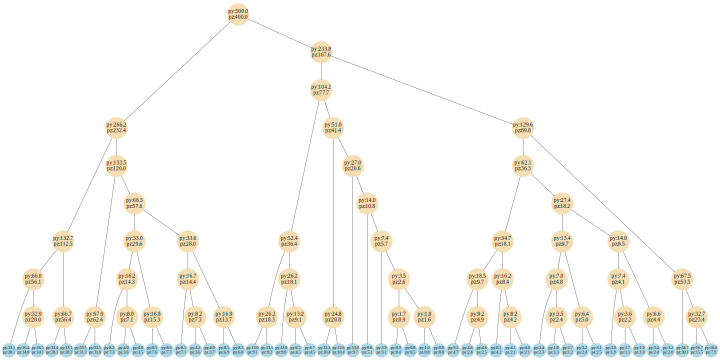

In [15]:
print('Beam Search LH JET')

tree = Tree1D.plotBinaryTree(
    BSO_jet,
    label=True,
    figFormat = "png",
)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="plots/1DTreeOnly/figBeamSize50_jet10")
display(tree)

Leaves ordered according to truth jet - Beam Search jet with greatest LH (top) vs TRUTH (bottom) trees


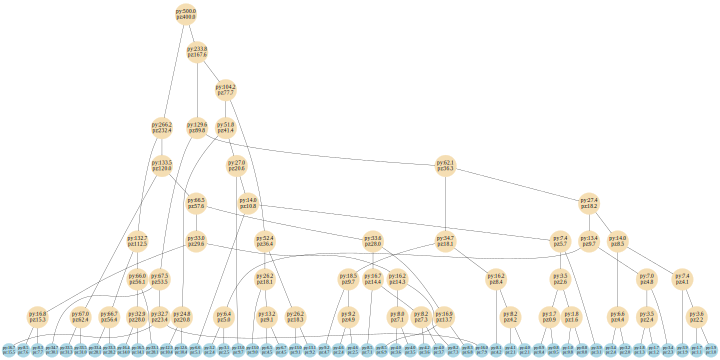

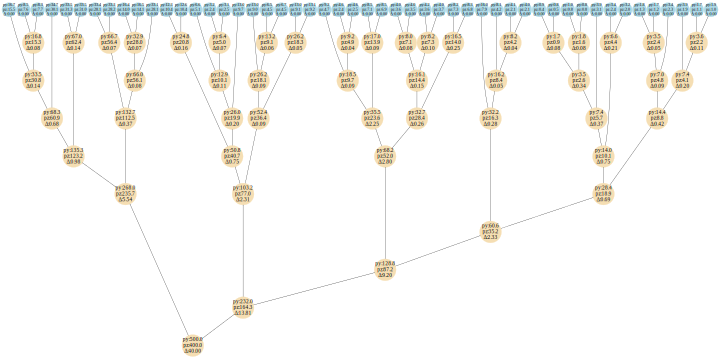

In [16]:
print("Leaves ordered according to truth jet - Beam Search jet with greatest LH (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    BSO_jet,
    truth_jet,
    truthOrder = True, 
    label=True,
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - kt jet with greatest LH (top) vs TRUTH (bottom) trees


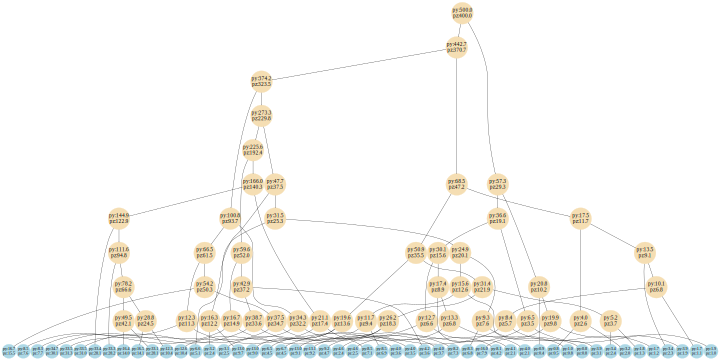

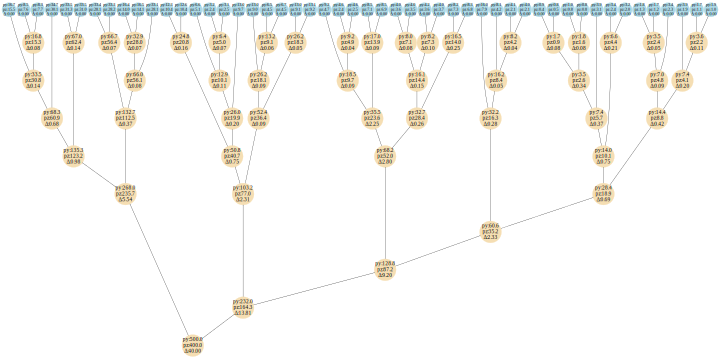

In [22]:
print("Leaves ordered according to truth jet - kt jet with greatest LH (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    reclusterKt,
    truth_jet,
    truthOrder = True, 
    label=True,
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to KT jet - Beam Search (top) vs KT (bottom) trees


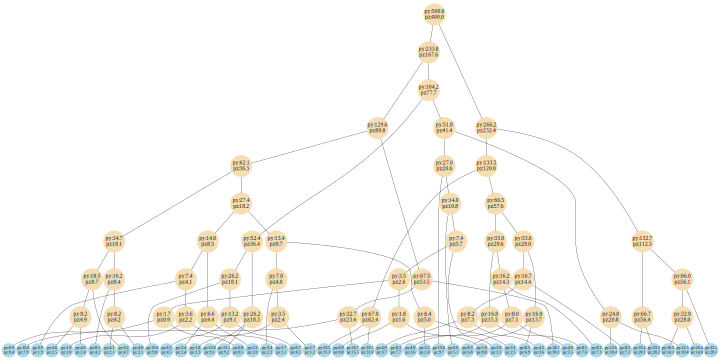

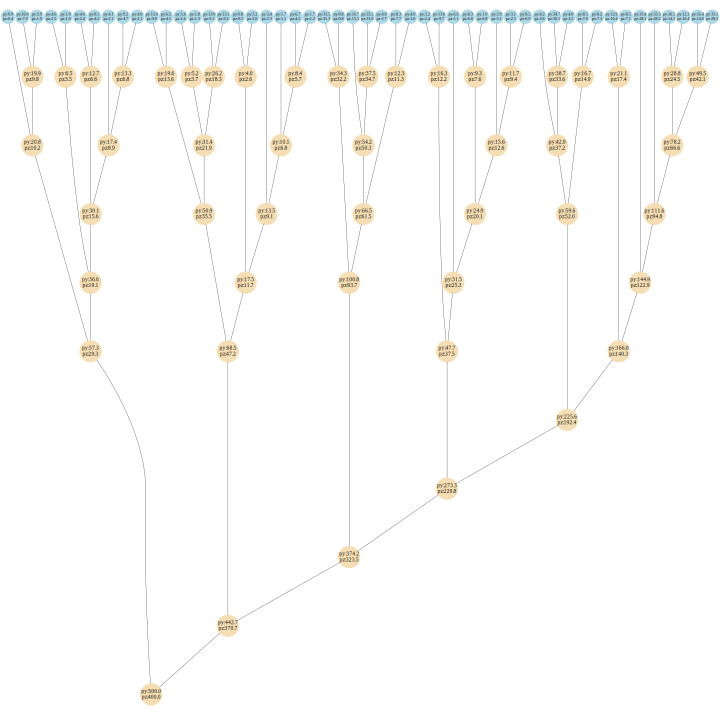

In [18]:
N=BSO_jet["Nconst"]
beamsizeList = np.minimum(np.concatenate(([1],np.arange(0.5,5.5,0.5)*N)),np.asarray(N*(N-1)/2 *np.ones(11))).astype(int)
reclusterKt["M_Hard"] = 80.

print("Leaves ordered according to KT jet - Beam Search (top) vs KT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    reclusterKt,
    BSO_jet,
    truthOrder = False,
    label = True,
    alpha_jet1 =  1,
    beamSize = beamsizeList[-1], 
    N_best = 1,
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="1." , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to ANTIKT jet - Beam Search (top) vs ANTIKT (bottom) trees


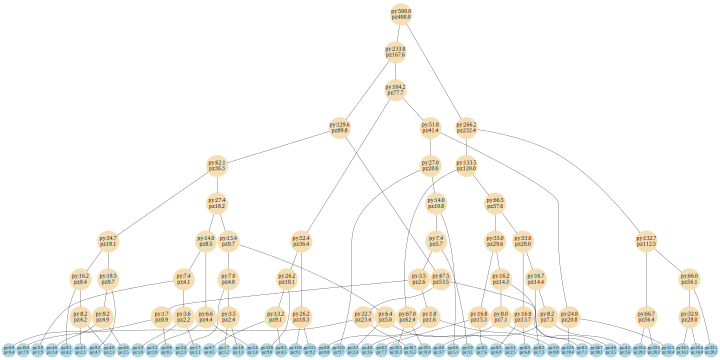

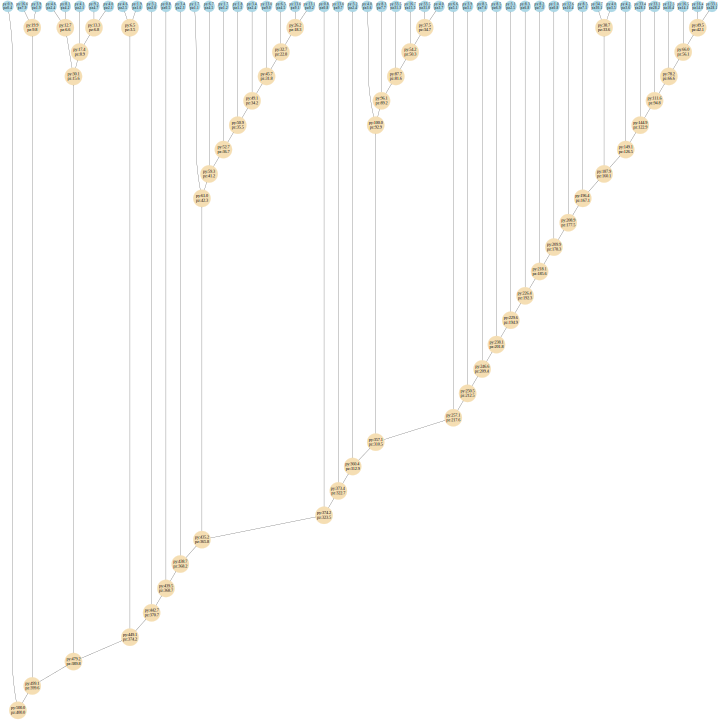

In [19]:
N=BSO_jet["Nconst"]
beamsizeList = np.minimum(np.concatenate(([1],np.arange(0.5,5.5,0.5)*N)),np.asarray(N*(N-1)/2 *np.ones(11))).astype(int)
reclusterAntikt["M_Hard"] = 80.

print("Leaves ordered according to ANTIKT jet - Beam Search (top) vs ANTIKT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    reclusterAntikt,
    BSO_jet,
    truthOrder = False,
    label = True,
    alpha_jet1 =  -1,
    beamSize = beamsizeList[-1], 
    N_best = 1,
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="1." , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to BS jet - Greedy (top) vs Beam Search (bottom) trees


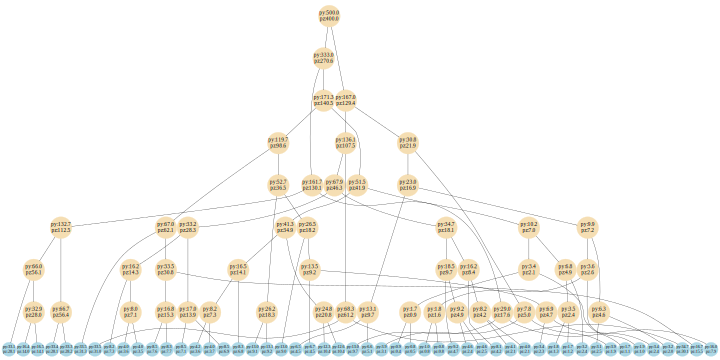

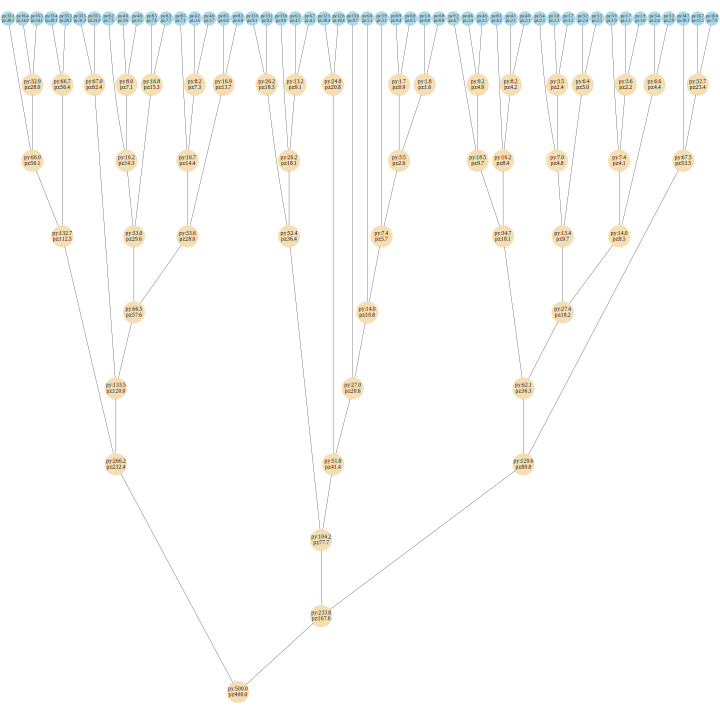

In [20]:
N=BSO_jet["Nconst"]
beamsizeList = np.minimum(np.concatenate(([1],np.arange(0.5,5.5,0.5)*N)),np.asarray(N*(N-1)/2 *np.ones(11))).astype(int)


print("Leaves ordered according to BS jet - Greedy (top) vs Beam Search (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(
    BSO_jet,
    Greedy_jet,
    truthOrder = False,
    label = True,
    alpha_jet1 =  -1,
    beamSize = beamsizeList[-1], 
    N_best = 1,
)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="1." , nodesep="0.01")
display(tree1)
display(tree2)

### Truth, BS and Greedy heat maps

2019-10-01 10:13:57,910:INFO::truth heat data ----  row: truth -- alpha column: truth


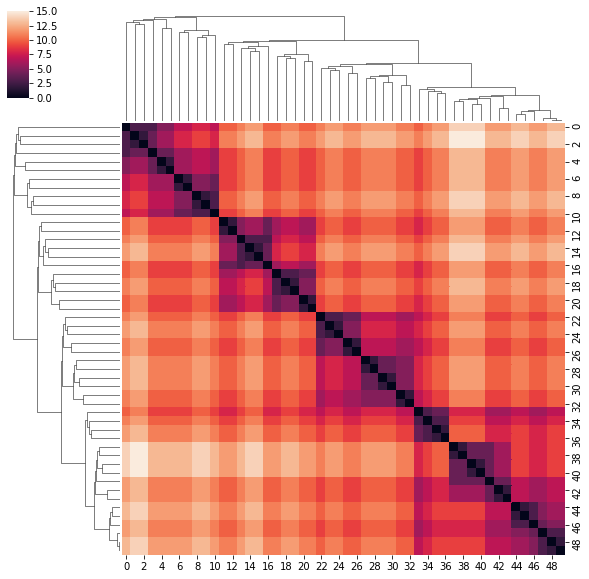

2019-10-01 10:13:58,525:INFO::beamSearch heat data ----  row: beamSearch -- alpha column: beamSearch


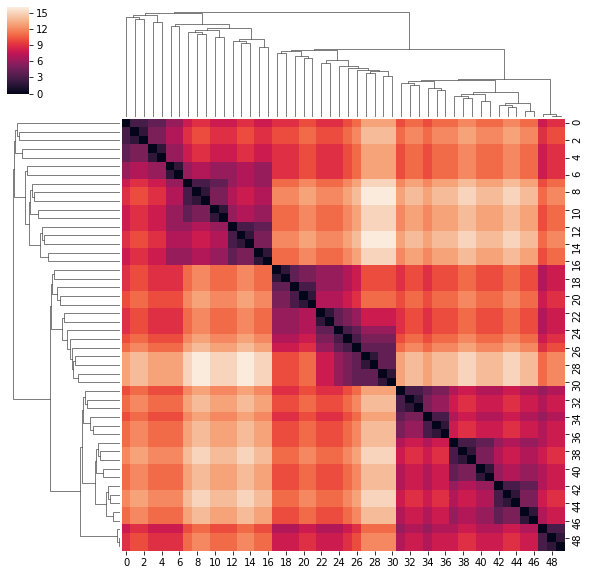

2019-10-01 10:13:58,929:INFO::greedyLH heat data ----  row: greedyLH -- alpha column: greedyLH


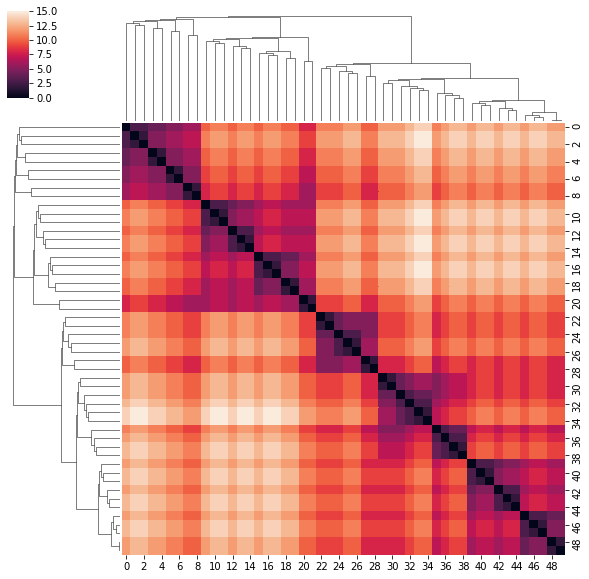

In [23]:
heatClustermap.HeatDendrogram(
    jet1=truth_jet,
    jet2=None,
    full_path=True, 
    FigName=None)

heatClustermap.HeatDendrogram(
    jet1=BSO_jet,
    jet2=None,
    full_path=True, 
    FigName=None)

heatClustermap.HeatDendrogram(
    jet1=Greedy_jet,
    jet2=None,
    full_path=True, 
    FigName=None)


### truth, BS and Greedy comparisons

2019-10-01 10:14:20,275:INFO::truth heat data ----  row: beamSearch -- alpha column: truth


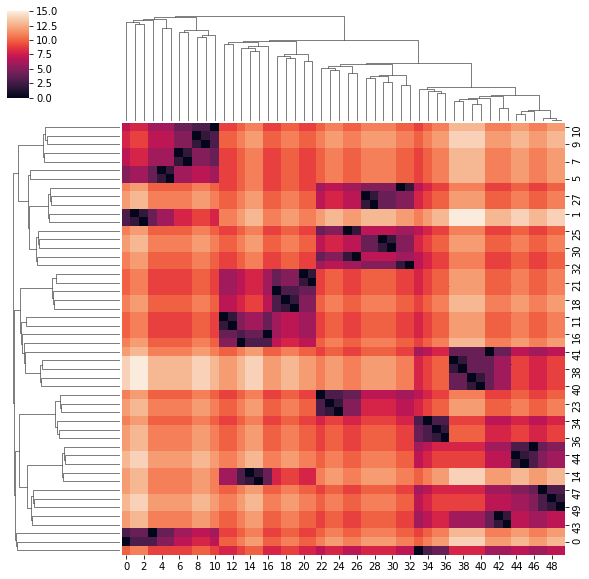

2019-10-01 10:14:20,818:INFO::truth heat data ----  row: greedyLH -- alpha column: truth


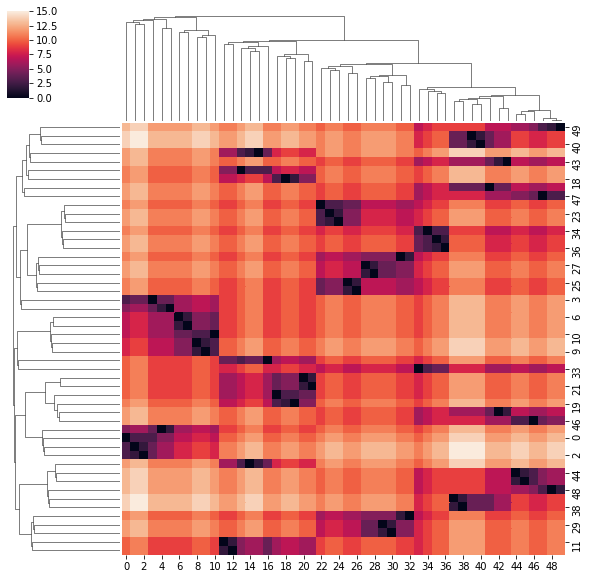

2019-10-01 10:14:21,217:INFO::beamSearch heat data ----  row: greedyLH -- alpha column: beamSearch


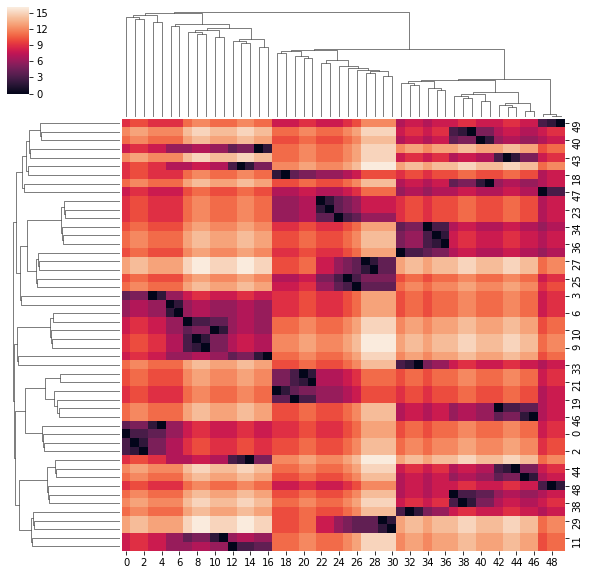

In [24]:
heatClustermap.HeatDendrogram(
    jet1=truth_jet,
    jet2=BSO_jet,
    full_path=True, 
    FigName=None)

heatClustermap.HeatDendrogram(
    jet1=truth_jet,
    jet2=Greedy_jet,
    full_path=True, 
    FigName=None)

heatClustermap.HeatDendrogram(
    jet1=BSO_jet,
    jet2=Greedy_jet,
    full_path=True, 
    FigName=None)

### kt and truth vs kt

2019-10-01 10:15:11,702:INFO::1 heat data ----  row: 1 -- alpha column: 1


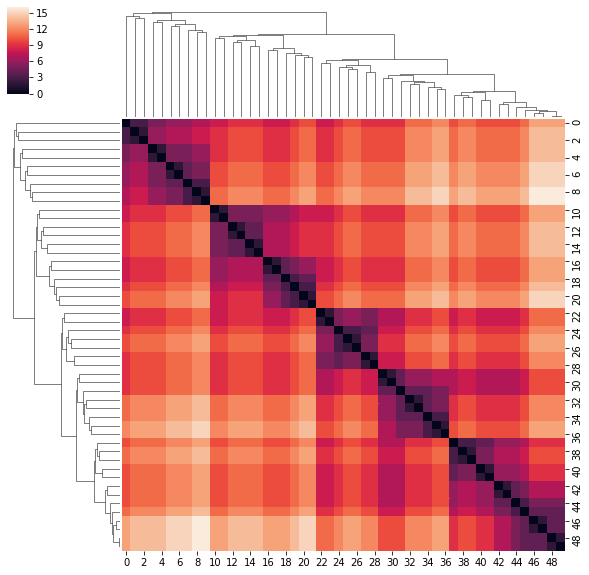

2019-10-01 10:15:12,113:INFO::truth heat data ----  row: 1 -- alpha column: truth


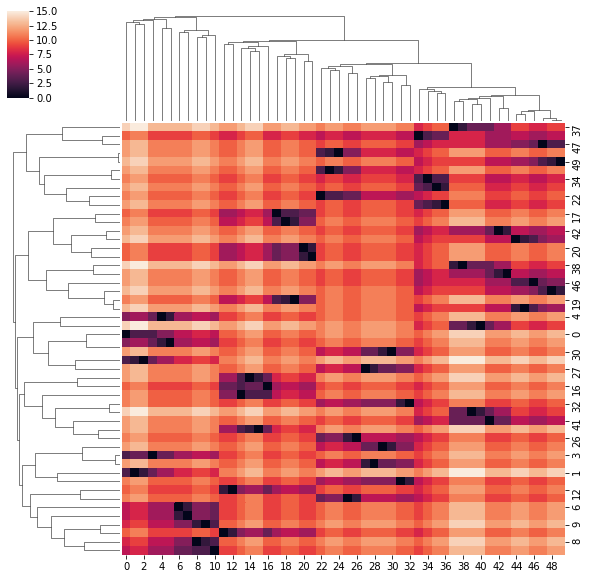

In [26]:
heatClustermap.HeatDendrogram(
    jet1=reclusterKt,
    jet2=None,
    full_path=True, 
    FigName=None)

heatClustermap.HeatDendrogram(
    jet1=truth_jet,
    jet2=reclusterKt,
    full_path=True, 
    FigName=None)